In [1]:
conda install astropy
conda install -m astropy astroquery

SyntaxError: invalid syntax (<ipython-input-1-263f918cd662>, line 1)

In [2]:
from astropy.io import fits
from astropy.utils.data import download_file

#img1=fits.getdata(filename)
image_file=download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)

In [3]:
fits.info(image_file)

Filename: /home/csat8786/.astropy/cache/download/py2/2c9202ae878ecfcb60878ceb63837f5f
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     161   (891, 893)   int16   
  1  er.mask     TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [4]:
image_data=fits.getdata(image_file, ext=0)
image_data.shape

(893, 891)

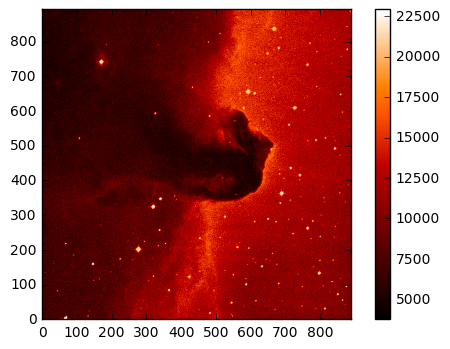

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.imshow(image_data, cmap='gist_heat', origin='lower')
plt.colorbar();

In [8]:
hdulist=fits.open(image_file)
hdulist.info()

Filename: /home/csat8786/.astropy/cache/download/py2/2c9202ae878ecfcb60878ceb63837f5f
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     161   (891, 893)   int16   
  1  er.mask     TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [9]:
header=hdulist['PRIMARY'].header
data=hdulist['PRIMARY'].data

In [10]:
hdulist.close()

In [13]:
header[:10]

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               

In [15]:
print(repr(header[:10]))

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               


In [17]:
print(header[:10].keys())
print(header[:10].values())
print(header['ORIGIN'])
print(header.comments['ORIGIN'])

['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'EXTEND', 'DATE', 'ORIGIN', 'SURVEY', 'REGION']
[True, 16, 2, 891, 893, True, '2014-01-09', 'STScI/MAST', 'SERC-ER', 'ER768']
STScI/MAST
GSSS: STScI Digitized Sky Survey


In [19]:
from astropy.wcs import WCS
wcs = WCS(header)
print wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 85.599416666666656  -4.9466388888888888  
CRPIX : -716.333144294269  -8444.6494669822605  
PC1_1 PC1_2  : 0.015029018460682027  -9.6373577765719806e-06  
PC2_1 PC2_2  : 1.0548917307845708e-05  0.015000473845055023  
CDELT : -0.018654788242111486  0.018654788242111486  
NAXIS : 891  893


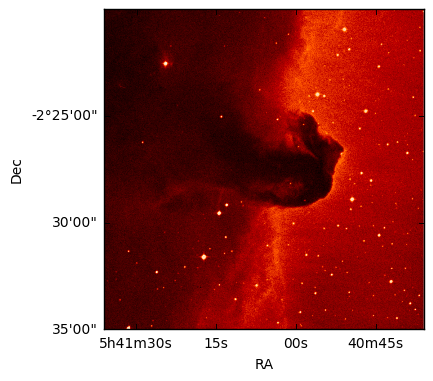

In [21]:
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8], projection=wcs)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(data, cmap='gist_heat', origin='lower')
ra=ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec=ax.coords[1]
dec.set_major_formatter('dd:mm:ss');

In [24]:
from astropy.coordinates import SkyCoord
c0=SkyCoord('5h41m00s','-2d27m00s', frame='icrs')
print c0

<SkyCoord (ICRS): (ra, dec) in deg
    ( 85.25, -2.45)>


In [25]:
#ra, dec= w.all_pix2world
center=wcs.all_world2pix(c0.ra,c0.dec,0)
print(center)

[array(534.1235215073059), array(475.5504697035576)]


In [27]:
from astropy.nddata import Cutout2D

size=400
cutout=Cutout2D(data, center, size, wcs=wcs)
print(cutout.bbox_original)

((276, 675), (334, 733))


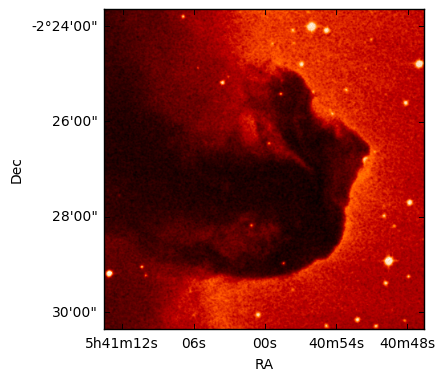

In [29]:
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8], projection=cutout.wcs)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(cutout.data, cmap='gist_heat', origin='lower')
ra=ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec=ax.coords[1]
dec.set_major_formatter('dd:mm:ss');

In [32]:
cheader = cutout.wcs.to_header()
primaryhdu= fits.PrimaryHDU(cutout.data, cheader)
hdulist= fits.HDUList([primaryhdu])
hdulist.writeto('horse.fits', overwrite=True)

In [33]:
from astropy.table import Table
t= Table.read(image_file, hdu=1)
t[:10].show_in_notebook()

idx,XI,ETA,XI_CORR,ETA_CORR
,DEGREES,DEGREES,ARCSEC,ARCSEC
0,-3.12,-3.12,0.09,0.04
1,-2.96,-3.12,0.02,0.07
2,-2.8,-3.12,-0.07,0.15
3,-2.64,-3.12,-0.17,0.25
4,-2.48,-3.12,-0.29,0.26
5,-2.32,-3.12,-0.38,0.25
6,-2.16,-3.12,-0.42,0.15
7,-2.0,-3.12,-0.48,0.06
8,-1.84,-3.12,-0.47,-0.01


In [34]:
print(t[:10])

   XI     ETA   XI_CORR ETA_CORR
DEGREES DEGREES  ARCSEC  ARCSEC 
------- ------- ------- --------
  -3.12   -3.12    0.09     0.04
  -2.96   -3.12    0.02     0.07
   -2.8   -3.12   -0.07     0.15
  -2.64   -3.12   -0.17     0.25
  -2.48   -3.12   -0.29     0.26
  -2.32   -3.12   -0.38     0.25
  -2.16   -3.12   -0.42     0.15
   -2.0   -3.12   -0.48     0.06
  -1.84   -3.12   -0.47    -0.01
  -1.68   -3.12   -0.47    -0.12


In [38]:
t['ETA'].format = '4.1f'
print(t[:10])

   XI     ETA   XI_CORR ETA_CORR
DEGREES DEGREES  ARCSEC  ARCSEC 
------- ------- ------- --------
  -3.12    -3.1    0.09     0.04
  -2.96    -3.1    0.02     0.07
   -2.8    -3.1   -0.07     0.15
  -2.64    -3.1   -0.17     0.25
  -2.48    -3.1   -0.29     0.26
  -2.32    -3.1   -0.38     0.25
  -2.16    -3.1   -0.42     0.15
   -2.0    -3.1   -0.48     0.06
  -1.84    -3.1   -0.47    -0.01
  -1.68    -3.1   -0.47    -0.12


In [40]:
import numpy as np
print t[np.where(t['ETA_CORR'] > 0.8)]

   XI     ETA   XI_CORR ETA_CORR
DEGREES DEGREES  ARCSEC  ARCSEC 
------- ------- ------- --------
  -0.24     3.0   -0.11     0.81
  -0.08     3.0   -0.06     0.86
   0.08     3.0    0.05     0.88
   0.24     3.0    0.13     0.82
  -0.24     3.1   -0.12     0.85
  -0.08     3.1   -0.07      0.9
   0.08     3.1    0.07     0.91
   0.24     3.1     0.2      0.9
    0.4     3.1    0.23     0.83


In [41]:
t1= Table([arr1,arr2], names=('a','b'))
col1=Table.Column(name='c', data=arr3)
t1.add_column(col1)
row=np.array([1,2,3])
t1.add_row(row)

NameError: name 'arr1' is not defined

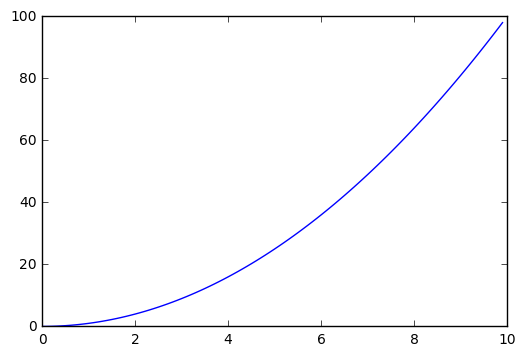

In [43]:
import numpy as np
from astropy.table import Table

a= np.arange(0,10,0.1)
b=a**2
t1=Table([a,b], names=('a','b'))

plt.plot(t1['a'],t1['b'])

In [47]:
t1.write('table.txt', format='ascii.tab', overwrite=True)
t1.write('table.tex', format='ascii.latex', overwrite=True)

In [51]:
from astropy import units as u
val1, val2= 30.2* u.cm, 2.2E4*u.s
val3=val1/val2
val3km=val3.to(u.km/u.s)
print(val3km)

1.37272727273e-08 km / s


In [56]:
from astropy import units as u
val=30.0*u.cm
print(val.to(u.km))

val1=10* u.km
val2=100 * u.m

print((val1/val2).decompose())

0.0003 km
100.0


In [60]:
from astropy import constants as c
#http://docs.astropy.org/en/stable/constants

print('solar mass: ', c.M_sun.value, c.M_sun.unit)
print(c.c)
print(c.c.cgs)

('solar mass: ', 1.9891e+30, Unit("kg"))
  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2010
29979245800.0 cm / s


In [63]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
pos=coords.SkyCoord('13h10m27.46s +18d26m17.4s', frame='icrs')
xid=SDSS.query_region(pos, spectro=True)
xid

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,str4
197.614455643,18.4381688537,1237668296598749280,5314,301,1,136,0.0124487,2618,54506,310,2947691243863304192,26,SDSS


In [65]:
sp=SDSS.get_spectra(matches=xid)
im=SDSS.get_images(matches=xid, band='r')

print(len(sp),len(im))

(1, 1)


In [66]:
template = SDSS.get_spectral_template('qso')
print()

In [67]:
hdulist =im[0]
hdulist.info()

Filename: (No file associated with this HDUList)
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      96   (2048, 1489)   float32   
  1              ImageHDU         6   (2048,)   float32   
  2              BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3              BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


((1489, 2048), 'float32')


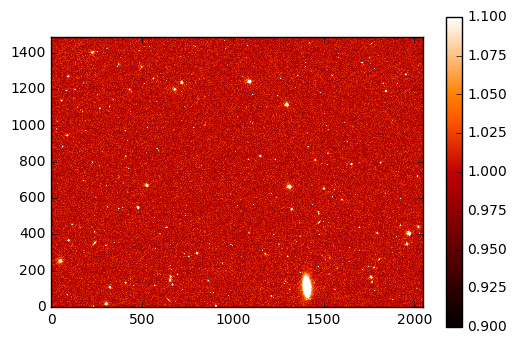

In [69]:
header=hdulist[0].header
data=hdulist[0].data
print(data.shape, data.dtype.name)

import numpy as np
plt.imshow(np.sqrt(data+1.), origin='lower', cmap='gist_heat', vmax=1.1, vmin=0.9)
plt.colorbar()

(array([  3.04611500e+06,   1.87500000e+03,   4.94000000e+02,
          2.52000000e+02,   1.16000000e+02,   7.20000000e+01,
          6.50000000e+01,   5.30000000e+01,   3.80000000e+01,
          4.40000000e+01,   4.20000000e+01,   2.90000000e+01,
          2.00000000e+01,   1.90000000e+01,   1.80000000e+01,
          1.00000000e+01,   1.20000000e+01,   9.00000000e+00,
          7.00000000e+00,   9.00000000e+00,   9.00000000e+00,
          1.30000000e+01,   7.00000000e+00,   1.10000000e+01,
          7.00000000e+00,   2.00000000e+00,   5.00000000e+00,
          5.00000000e+00,   7.00000000e+00,   4.00000000e+00,
          4.00000000e+00,   4.00000000e+00,   2.00000000e+00,
          5.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          6.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
        

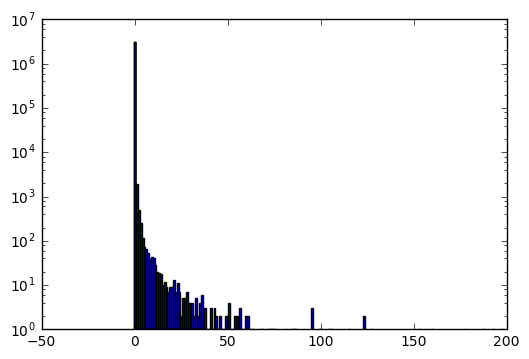

In [70]:
fig,ax=plt.subplots()
ax.set_yscale('log')
ax.hist(data.ravel(),200)


In [71]:
c0=SkyCoord('13h10m27.46s', '+18d26m17.4s', frame='icrs')
wcs=WCS(header)
center=wcs.all_world2pix(c0.ra,c0.dec,0)
size=400
cutout=Cutout2D(data,center,size,wcs=wcs)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


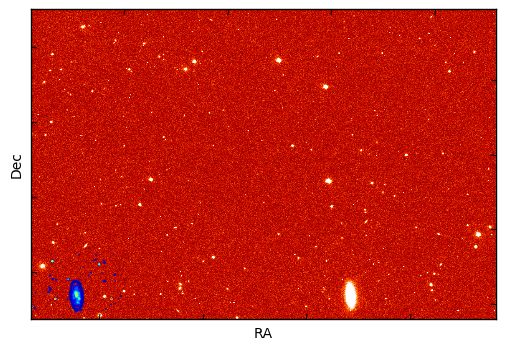

In [72]:
ax=plt.subplot(projection=cutout.wcs)
ra=ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(np.sqrt(data+1.), origin='lower', cmap='gist_heat', vmax=1.1, vmin=0.9, aspect='auto')

a=np.sqrt(cutout.data+1.)
mina=np.min(a)
maxa=np.max(a)
levels=np.arange(mina, maxa, (maxa-mina)/20.)
labels=[item.get_text() for item in ax.get_xticklabels()]
ax.contour(a,levels,color='cyan')

In [74]:
from astroquery.skyview import SkyView
survey='WISE 12'
sv=SkyView()
paths=sv.get_images(position='M82', survey=['WISE 12', 'GALEX Near UV'])

In [76]:
from astropy.wcs import WCS
wcs1=WCS(paths[0][0].header)
wcs2=WCS(paths[1][0].header)

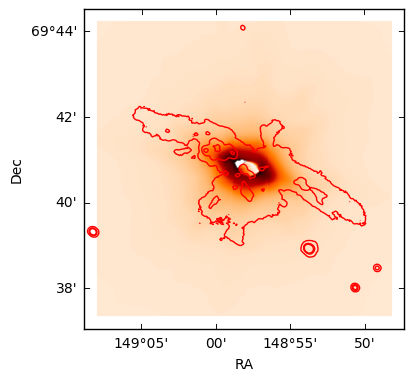

In [78]:
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8], projection=wcs1)
ax.imshow(paths[0][0].data, origin='lower', cmap='gist_heat_r')
ima2=paths[1][0].data
levels=np.arange(np.nanmin(ima2),np.nanmax(ima2),1.)
levels=np.nanmin(ima2)+[0.02,0.09,0.2]
ax.contour(ima2,levels, transform=ax.get_transform(wcs2), colors='r')

plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()